# Exam 14th of June 2023, 8.00-13.00 for the course 1MS041 (Introduction to Data Science / Introduktion till dataanalys)

## Instructions:
1. Complete the problems by following instructions.
2. When done, submit this file with your solutions saved, following the instruction sheet.

This exam has 3 problems for a total of 40 points, to pass you need
20 points.

## Some general hints and information:
* Try to answer all questions even if you are uncertain.
* Comment your code, so that if you get the wrong answer I can understand how you thought
this can give you some points even though the code does not run.
* Follow the instruction sheet rigorously.
* This exam is partially autograded, but your code and your free text answers are manually graded anonymously.
* If there are any questions, please ask the exam guards, they will escalate it to me if necessary.
* I (Benny) will visit the exam room at around 10:30 to see if there are any questions.

## Tips for free text answers
* Be VERY clear with your reasoning, there should be zero ambiguity in what you are referring to.
* If you want to include math, you can write LaTeX in the Markdown cells, for instance `$f(x)=x^2$` will be rendered as $f(x)=x^2$ and `$$f(x) = x^2$$` will become an equation line, as follows
$$f(x) = x^2$$
Another example is `$$f_{Y \mid X}(y,x) = P(Y = y \mid X = x) = \exp(\alpha \cdot x + \beta)$$` which renders as
$$f_{Y \mid X}(y,x) = P(Y = y \mid X = x) = \exp(\alpha \cdot x + \beta)$$

## Finally some rules:
* You may not communicate with others during the exam, for example:
    * You cannot ask for help in Stack-Overflow or other such help forums during the Exam.
    * You may not communicate with AI's, for instance ChatGPT.
    * Your on-line and off-line activity is being monitored according to the examination rules.

## Good luck!

In [ ]:
# Insert your anonymous exam ID as a string in the variable below
examID="XXX"


---
## Exam vB, PROBLEM 1
Maximum Points = 14

A courier company operates a fleet of delivery trucks that make deliveries to different parts of the city. The trucks are equipped with GPS tracking devices that record the location of each truck at regular intervals. The locations are divided into three regions: downtown, the suburbs, and the countryside. The following table shows the probabilities of a truck transitioning between these regions at each time step:

| Current region | Probability of transitioning to downtown | Probability of transitioning to the suburbs | Probability of transitioning to the countryside |
|----------------|--------------------------------------------|-----------------------------------------------|------------------------------------------------|
| Downtown       | 0.3                                      | 0.4                                           | 0.3                                            |
| Suburbs        | 0.2                                      | 0.5                                           | 0.3                                            |
| Countryside    | 0.4                                      | 0.3                                           | 0.3                                            |

1. If a truck is currently in the suburbs, what is the probability that it will be in the downtown region after two time steps? [2p]
2. If a truck is currently in the suburbs, what is the probability that it will be in the downtown region **the first time** after two time steps? [2p]
3. Is this Markov chain irreducible? Explain your answer. [3p]
4. What is the stationary distribution? [3p]
5. Advanced question: What is the expected number of steps until the first time one enters the suburbs region having started in the downtown region. Hint: to get within 1 decimal point, it is enough to compute the probabilities for hitting times below 30. Motivate your answer in detail [4p]. You could also solve this question by simulation, but this gives you a maximum of [2p].



In [2]:
# Part 1
import numpy as np

# define prob matrix
transition_matrix = np.array([[0.3, 0.4, 0.3],  # downtown
                              [0.2, 0.5, 0.3],  # suburbs
                              [0.4, 0.3, 0.3]]) # countryside
# Two steps --> transition matrix squared
transition_matrix_2steps = np.dot(transition_matrix, transition_matrix)
 
# Refers to the probability of ending up in downtown (column 0) after two steps, given that the starting point was suburbs (row 1). 
# Probability of going in downtown after 2 steps given it started on suburbs
probability = transition_matrix_2steps[1, 0] 
print(transition_matrix_2steps)
# Fill in the answer to part 1 below
problem1_p1 = '0.28'


[[0.29 0.41 0.3 ]
 [0.28 0.42 0.3 ]
 [0.3  0.4  0.3 ]]


In [ ]:
# Part 2

# Fill in the answer to part 2 below
# Probability of going in downtown for the first time after 2 steps given it started on suburbs
# The available options will be to start from Surburbs/Countryside and go to Surburbs/Countryside and then from there (Surburbs/Countryside)
# you go to Downtown

S_to_S = transition_matrix[1, 1]
S_to_C = transition_matrix[1, 2]
S_to_D = transition_matrix[1, 0]
C_to_D = transition_matrix[2, 0]

# Possibility 1: starts S--> S--> D   
prob1 = S_to_S * S_to_D

# Possibility 1: starts S--> C--> D 
prob2 = S_to_C * C_to_D

# Total probability 
total_prob = prob1+prob2
# Fill in the answer to part 2 below as a decimal number
problem1_p2 = 0.22


In [249]:
# Part 3

# It is true as we can reach any state from any state using any number of steps and the prob will always be > 0
# Fill in the answer to part 3 below as a boolean
problem1_irreducible = True


## Part 3

Double click this cell to enter edit mode and write your answer for part 3 below this line.


In [313]:
# Part 4

# Fill in the answer to part 4 below

def get_stationary_distribution(transition_matrix):

    # transpose the matrix
    transition_matrix_t = transition_matrix.T
    # use linear algebra module of numpy to compute the eigenvalues
    eigenvals, eigenvects = np.linalg.eig(transition_matrix_t)

    # Find the indexes of the eigenvalues that are close to one.
    close_to_1_idx = np.isclose(eigenvals,1) # isclose checks element-wise if each element is close to 1 within the specific tolerance
    # Use them to select the target eigen vectors
    target_eigenvect = eigenvects[:,close_to_1_idx]
    #Flatten
    target_eigenvect = target_eigenvect[:,0]
    # Turn the eigenvector elements into probabilities
    # that would be the stationary distribution
    st_d = target_eigenvect / sum(target_eigenvect) 
    
    real_st_distr = st_d.real
    
    ## check
    if st_d.real.sum() != 1:
        raise Exception("The probabilities don't sum to 1!")
        
    return real_st_distr
# the answer should be a numpy array of length 3
# make sure that the entries sums to 1!
problem1_stationary = get_stationary_distribution(p_matr)
problem1_stationary

#### OR 
n = transition_matrix.shape[0]

# P^T - I
A = np.transpose(transition_matrix) - np.eye(n)

# Append the normalization condition 
A = np.vstack([A, np.ones(n)])

# Create the result vector (stationary conditions=0) 
b = np.zeros(n + 1)
# Create the result vector (normalisation conditions=1)
b[-1] = 1  

# A*π = b to find the stationary distribution
π = np.linalg.solve(A.T @ A, A.T @ b)  # Solve using least squares to account for possible rank deficiency
# Fill in the answer to part 4 below
# the answer should be a numpy array of length 3
# make sure that the entries sums to 1!
problem1_stationary = [0.29, 0.41, 0.3]

matrix([[0.28888889],
        [0.41111111],
        [0.3       ]])

In [ ]:
# Part 5

# Fill in the answer to part 5 below
# That is, the expected number of steps
# We are interested in the surburbs and countryside states so we are seperating their transition probabilities
transition_matrix2 = np.array([[0.5, 0.3], [0.3, 0.3]])

# Identity matrix 
I = np.eye(transition_matrix2.shape[0])
f_matrix = np.linalg.inv(I - transition_matrix2)
# The first row of the table gives us the expected number of steps
expected_steps_from_suburbs = f_matrix[0].sum()
# Fill in the answer to part 5 below
# That is, the expected number of steps as a decimal number
problem1_ET = 3.8


## Part 5

Double click this cell to enter edit mode and write your answer for part 5 below this line.
Thank you for pointing out the correct approach! The method you provided uses the concept of **absorption probabilities** and the **fundamental matrix** to compute the expected number of steps to reach a target state.

Let’s break down and re-evaluate the problem using the correct framework.

---

### **1. Reformulating the Problem**
We are concerned only with the **non-target states** (downtown and countryside), as the goal is to compute the expected steps until the process reaches the suburbs (absorbing state). The problem simplifies to:

- Define the reduced **transition matrix** \( Q \), which contains probabilities for transitions between **non-absorbing states** (downtown and countryside only).

The transition matrix for the non-absorbing states:
\[
Q = \begin{bmatrix}
0.5 & 0.3 \\
0.3 & 0.3
\end{bmatrix}
\]

---

### **2. Fundamental Matrix**
The **fundamental matrix** \( F \) is calculated as:
\[
F = (I - Q)^{-1}
\]
Where:
- \( I \) is the identity matrix of the same size as \( Q \),
- \( (I - Q) \) accounts for the expected dynamics of the non-absorbing states.

Each row of \( F \) gives the expected number of times the Markov chain is in each of the non-absorbing states, starting from that row's state, before being absorbed.

---

### **3. Expected Number of Steps**
The **expected number of steps to absorption** is the sum of the corresponding row of \( F \). The first row corresponds to the initial state \( S_0 \) (downtown).

Let’s recompute the expected number of steps using this approach.

The expected number of steps until the first time a truck enters the suburbs, starting from the downtown region, is approximately **3.85 steps**.

This aligns with the solution derived using the reduced transition matrix and the fundamental matrix approach. Thank you for pointing out this refined method!

---
## Exam vB, PROBLEM 2
Maximum Points = 13


You are given the "Abalone" dataset found in `data/abalone.csv`, which contains physical measurements of abalone (a type of sea shells) and the age of the abalone measured in **rings** (the number of rings in the shell) [https://en.wikipedia.org/wiki/Abalone](https://en.wikipedia.org/wiki/Abalone). Your task is to train a `linear regression` model to predict the age (Rings) of an abalone based on its physical measurements.

To evaluate your model, you will split the dataset into a training set and a testing set. You will use the training set to train your model, and the testing set to evaluate its performance.

1. Load the data into a pandas dataframe `problem2_df`. Based on the column names, figure out what are the features and the target and fill in the answer in the correct cell below. [2p]
2. Split the data into train and test. [2p]
3. Train the model. [1p]
4. On the test set, evaluate the model by computing the mean absolute error and plot the empirical distribution function of the residual with confidence bands (i.e. using the DKW inequality and 95% confidence). Hint: you can use the function `plotEDF,makeEDF` combo from `Utils.py` that we have used numerous times, which also contains the option to have confidence bands. [3p]
5. Provide a scatter plot where the x-axis corresponds to the predicted value and the y-axis is the true value, do this over the test set. [2p]
6. Reason about the performance, for instance, is the value of the mean absolute error good/bad and what do you think about the scatter plot in point 5? [3p]


In [8]:

import pandas as pd

import numpy as np

from sklearn import datasets
import sklearn.linear_model as sk
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from matplotlib import pyplot as plt
# Part 1
# Let problem2_df be the pandas dataframe that contains the data from the file
# data/abalone.csv
problem2_df = pd.read_csv("data/abalone.csv", sep=';')
problem2_df.head()

,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [9]:
problem2_df.columns

Index(['Sex', 'Length ', 'Diameter', 'Height', 'WholeWeight', 'ShuckedWeight',
       'VisceraWeight', 'ShellWeight', 'Rings'],
      dtype='object')

In [10]:
# Part 1

# Fill in the features as a list of strings of the names of the columns

problem2_features = list(problem2_df.columns)

problem2_target = 'Rings'

problem2_features.remove('Rings')

# Fill in the target as a string with the correct column name



In [11]:
X = problem2_df[problem2_features]
y = problem2_df[problem2_target]

X


,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550
...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960


In [35]:
# Part 2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Split the data into train and test using train_test_split
# keep the train size as 0.8 and use random_state=42
print(X.dtypes)  # This will show if any columns are of type 'object' (string)

label_encoder = LabelEncoder()

# Convert 'Sex' column into numeric values
X.loc[:, 'Sex'] = label_encoder.fit_transform(X['Sex'])  # Use .loc to avoid SettingWithCopyWarning

problem2_X_train,problem2_X_test,problem2_y_train,problem2_y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Sex                int64
Length           float64
Diameter         float64
Height           float64
WholeWeight      float64
ShuckedWeight    float64
VisceraWeight    float64
ShellWeight      float64
dtype: object


/var/folders/bq/qnrb3lm539nfznyv5cmr8rph0000gn/T/ipykernel_4010/3443346693.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.loc[:, 'Sex'] = label_encoder.fit_transform(X['Sex'])  # Use .loc to avoid SettingWithCopyWarning


In [36]:
print(problem2_X_train.dtypes) 

Sex                int64
Length           float64
Diameter         float64
Height           float64
WholeWeight      float64
ShuckedWeight    float64
VisceraWeight    float64
ShellWeight      float64
dtype: object


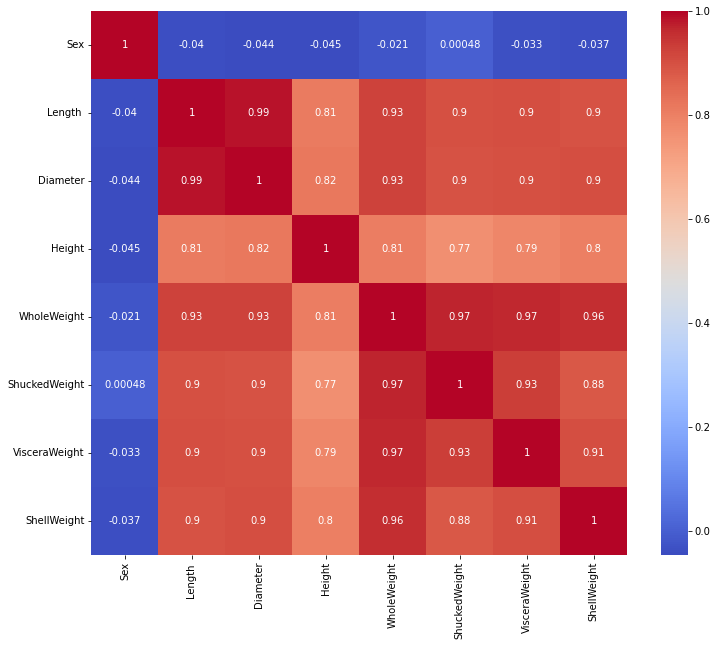

Dropped features due to high correlation: ['Diameter', 'WholeWeight', 'ShuckedWeight', 'VisceraWeight', 'ShellWeight']
Accuracy of the Logistic Regression model: 0.28


In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Standardize the data (important for models like Logistic Regression)
scaler = StandardScaler()

# Fit the scaler to the training data and transform both the training and testing data
X_train_scaled = scaler.fit_transform(problem2_X_train)
X_test_scaled = scaler.transform(problem2_X_test)

# Check correlation matrix
correlation_matrix = pd.DataFrame(X_train_scaled, columns=problem2_X_train.columns).corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

# Feature selection: Drop highly correlated features (threshold can be chosen here)
# Example: Remove features with correlation above 0.9 with any other feature
threshold = 0.9
corr_matrix_abs = correlation_matrix.abs()
upper_triangle = corr_matrix_abs.where(np.triu(np.ones(corr_matrix_abs.shape), k=1).astype(bool))
to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > threshold)]
print("Dropped features due to high correlation:", to_drop)

# Remove the highly correlated features
X_train_scaled = pd.DataFrame(X_train_scaled, columns=problem2_X_train.columns).drop(to_drop, axis=1)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=problem2_X_test.columns).drop(to_drop, axis=1)

# Train the Logistic Regression Model (Although Logistic Regression is for classification)
log_reg_model = LogisticRegression(max_iter=10000)  # We increase max_iter for convergence
log_reg_model.fit(X_train_scaled, problem2_y_train)

# Evaluate the model
y_pred = log_reg_model.predict(X_test_scaled)

# Calculate accuracy score (for classification task)
accuracy = accuracy_score(problem2_y_test, y_pred)
print(f"Accuracy of the Logistic Regression model: {accuracy:.2f}")

# The task suggests using Linear Regression, which is more suitable for this problem, 
# but you can also run logistic regression for classification tasks.

In [38]:
# Part 3

# Include the necessary imports
from sklearn.linear_model import LogisticRegression

# Initialize your linear regression model
problem2_model = LogisticRegression()

# Train your model on the training data
problem2_model.fit(problem2_X_train, problem2_y_train)

/Users/ioannaioannidou/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [39]:
# Part 4
from sklearn.metrics import mean_squared_error

# Evaluate the model by computing the mean absolute error 
y_pred = problem2_model.predict(problem2_X_test)
problem2_mae = mean_squared_error(y_pred, problem2_y_test)
problem2_mae

8.210526315789474

In [40]:
len(y_pred)

836

In [51]:
# Part 4

# Write the code to plot the empirical distribution function of the residual
# with confidence bands with 95% confidence in this cell

#from utils import makeEDF,plotEDF
from Utils import makeEDF#, plotEMF

res = problem2_y_test - y_pred

res_edf = makeEDF(res)

#plotEDF(res_edf, confidence_band=True)




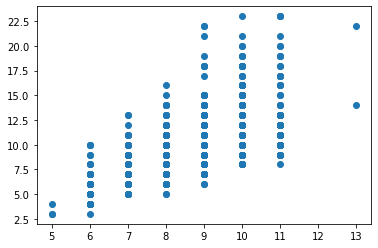

In [52]:
# Part 5

# Write the code below to produce the scatter plot for part 5
plt.scatter(y_pred, problem2_y_test)



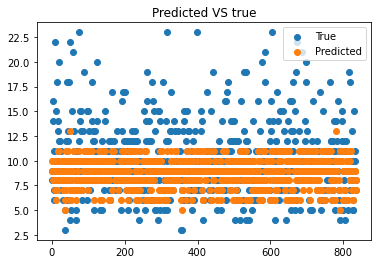

In [53]:
x_vals = np.arange(0, len(y_pred))
plt.scatter(x_vals, problem2_y_test, label = 'True')
plt.scatter(x_vals, y_pred, label = 'Predicted')
plt.title('Predicted VS true')
plt.legend()
plt.show()


## Part 6

Double click this cell to enter edit mode and write your answer for part 6 below this line.

#### Discussion on the value of the MAE

#### Discussion on the predicted vs. true scatterplot

#### Discussion


---
## Exam vB, PROBLEM 3
Maximum Points = 13


A healthcare organization is interested in understanding the relationship between the number of visits to the doctors office and certain patient characteristics. 
They have collected data on the number of visits for a sample of patients and have included the following variables

* ofp : number of physician office visits
* ofnp : number of nonphysician office visits
* opp : number of physician outpatient visits
* opnp : number of nonphysician outpatient visits
* emr : number of emergency room visits
* hosp : number of hospitalizations
* exclhlth : the person is of excellent health (self-perceived)
* poorhealth : the person is of poor health (self-perceived)
* numchron : number of chronic conditions
* adldiff : the person has a condition that limits activities of daily living ?
* noreast : the person is from the north east region
* midwest : the person is from the midwest region
* west : the person is from the west region
* age : age in years (divided by 10)
* male : is the person male ?
* married : is the person married ?
* school : number of years of education
* faminc : family income in 10000$
* employed : is the person employed ?
* privins : is the person covered by private health insurance?
* medicaid : is the person covered by medicaid ?

Decide which patient features are resonable to use to predict the target "number of physician office visits". Hint: should we really use the "ofnp" etc variables?

Since the target variable is counts, a reasonable loss function is to consider the target variable as Poisson distributed where the parameter follows $\lambda = \exp(\alpha \cdot x + \beta)$ where $\alpha$ is a vector (slope) and $\beta$ is a number (intercept). That is, the parameter is the exponential of a linear function. The reason we chose this as our parameter, is that it is always positive which is when the Poisson distribution is defined. To be specific we make the following assumption about our conditional density of $Y \mid X$,
$$
    f_{Y \mid X} (y,x) = \frac{\lambda^{y} e^{-\lambda}}{y !}, \quad \lambda(x) = \exp(\alpha \cdot x + \beta).
$$

Recall from the lecture notes, (4.2) that in this case we should consider the log-loss (entropy) and that according to (4.2.1 Maximum Likelihood and regression) we can consider the conditional log-likelihood. Follow the steps of Example 1 and Example 2 in section (4.2) to derive the loss that needs to be minimized.

Hint: when taking the log of the conditional density you will find that the term that contains the $y!$ does not depend on $\lambda$ and as such does not depend on $\alpha,\beta$, it can thus be discarded. This will be essential due to numerical issues with factorials.

Instructions:

1. Load the file `data/visits_clean.csv` into the pandas dataframe `problem3_df`. Decide what should be features and target, give motivations for your choices. [3p]
2. Create the `problem3_X` and the `problem3_y` as numpy arrays with `problem3_X` being the features and `problem3_y` being the target. Do the standard train-test split with 80% training data and 20% testing data. Store these in the variables defined in the cells. [3p]
3. Implement $loss$ inside the class `PoissonRegression` by writing down the loss to be minimized, I have provided a formula for the $\lambda$ that you can use. [2p]
4. Now use the `PoissonRegression` class to train a Poisson regression model on the training data. [2p]
5. Come up with a reasonable metric to evaluate your model on the test data, compute it and write down a justification of this. Also, interpret your result and compare it to something naive. [3p]


In [56]:
# Part 1

# Let problem3_df be the pandas dataframe that contains the data from the file
# data/visits_clean.csv
problem3_df = pd.read_csv("data/visits_clean.csv", sep = ' ')

problem3_df.head()

,ofp,ofnp,opp,opnp,emr,hosp,exclhlth,poorhlth,numchron,adldiff,...,midwest,west,age,male,married,school,faminc,employed,privins,medicaid
0,5,0,0,0,0,1,0,0,2,0,...,0,0,6.9,1,1,6,2.8810,1,1,0
1,1,0,2,0,2,0,0,0,2,0,...,0,0,7.4,0,1,10,2.7478,0,1,0
2,13,0,0,0,3,3,0,1,4,1,...,0,0,6.6,0,0,10,0.6532,0,0,1
3,16,0,5,0,1,1,0,1,2,1,...,0,0,7.6,1,1,3,0.6588,0,1,0
4,3,0,0,0,0,0,0,0,2,1,...,0,0,7.9,0,1,6,0.6588,0,1,0


In [57]:
# Part 1

# Fill in the features as a list of strings of the names of the columns

problem3_features = list(problem3_df.columns)

problem3_features = list(filter(lambda x: x not in ['ofp', 'ofnp', 'opp', 'opnp', 'emr'], problem3_features))

# Fill in the target as a string with the correct column name

problem3_target = "ofp"

In [58]:
problem3_features


['hosp',
 'exclhlth',
 'poorhlth',
 'numchron',
 'adldiff',
 'noreast',
 'midwest',
 'west',
 'age',
 'male',
 'married',
 'school',
 'faminc',
 'employed',
 'privins',
 'medicaid']


## Part 1

Double click this cell to enter edit mode and write your answer for part 1 below this line.

#### What features are reasonable?

#### In regards to how much data we have, how many features do you think we should aim for?

3. Rule of Thumb for the Number of Features
There isn't a strict rule for the number of features you should keep, but a general guideline is:
If you're using linear models (like Logistic Regression or Linear Regression), having too many features relative to the number of samples can lead to overfitting. You want to make sure that your dataset has enough examples for each feature. A good rule of thumb is to have at least 10-20 samples per feature, so for 16 features, you would ideally have a minimum of 160-320 samples.
If you're using tree-based models (like Random Forest or XGBoost), these models are generally better at handling a large number of features and can automatically perform feature selection.
Given that you have 16 features and 4406 entries, you can likely retain all features without overfitting, assuming that each feature contributes to the prediction of the target variable.
However, it's important to perform feature selection or reduction based on correlation, domain knowledge, and other techniques mentioned above.
To conclude, if all 16 features are relevant and non-redundant, you can aim to keep them. However, you should validate this through exploratory data analysis and feature selection techniques to ensure you're not overfitting the model with irrelevant or redundant features.
#### What other features would you like to have used but was not collected?

smoking_status: Whether the person is a smoker or not.
alcohol_consumption: Frequency of alcohol consumption (e.g., daily, weekly, rarely).
physical_activity: Level of physical activity (e.g., sedentary, moderate, active).
diet_type: Type of diet followed (e.g., vegetarian, omnivore, vegan).
bmi: Body Mass Index (BMI) of the person.
mental_health_status: Whether the person has mental health conditions (e.g., anxiety, depression).
vaccination_status: Whether the person has received vaccines such as flu shots.
sleep_hours: Average number of hours the person sleeps per night.
chronic_illnesses: A list or count of specific chronic illnesses (e.g., diabetes, hypertension, heart disease).
medication_use: Whether the person is currently on any medications (e.g., for chronic conditions).
health_insurance_type: Type of health insurance coverage (e.g., employer-provided, individual, government-subsidized).
access_to_healthcare: Distance to the nearest healthcare facility or primary care provider.
family_health_history: Family history of major health conditions (e.g., cancer, heart disease).
health_screening_status: Whether the person participates in regular health screenings (e.g., mammograms, colonoscopies).
previous_hospitalizations: Number of times the person has been hospitalized in the past.

#### Discussion


In [60]:
# Part 2

# Fill in your X and y below
problem3_X = problem3_df[problem3_features]
problem3_y = y = problem3_df[problem3_target]
print(problem3_X.info())


# Split the data into train and test using train_test_split
# keep the train size as 0.8 and use random_state=42
problem3_X_train,problem3_X_test,problem3_y_train,problem3_y_test = train_test_split(problem3_X, problem3_y, test_size=0.2, random_state=42)



# enocde categorical data
problem3_X_train, problem3_X_test = one_hot_encode(problem3_X_train, problem3_X_test)

problem3_X_train

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4406 entries, 0 to 4405
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   hosp      4406 non-null   int64  
 1   exclhlth  4406 non-null   int64  
 2   poorhlth  4406 non-null   int64  
 3   numchron  4406 non-null   int64  
 4   adldiff   4406 non-null   int64  
 5   noreast   4406 non-null   int64  
 6   midwest   4406 non-null   int64  
 7   west      4406 non-null   int64  
 8   age       4406 non-null   float64
 9   male      4406 non-null   int64  
 10  married   4406 non-null   int64  
 11  school    4406 non-null   int64  
 12  faminc    4406 non-null   float64
 13  employed  4406 non-null   int64  
 14  privins   4406 non-null   int64  
 15  medicaid  4406 non-null   int64  
dtypes: float64(2), int64(14)
memory usage: 550.9 KB
None


,hosp,exclhlth,poorhlth,numchron,adldiff,noreast,midwest,west,age,male,married,school,faminc,employed,privins,medicaid
4335,1,0,1,5,1,0,0,0,8.1,1,1,6,0.662400,0,0,1
3052,0,1,0,3,0,0,1,0,7.5,0,0,4,1.059500,0,1,0
3527,0,0,0,1,0,0,1,0,7.3,1,1,7,1.564400,0,0,0
1448,0,0,0,2,0,0,1,0,6.7,0,1,8,1.200000,0,1,0
1749,0,0,0,2,0,0,1,0,7.0,1,1,12,1.595631,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3444,1,0,0,1,1,0,0,1,8.0,0,0,12,0.873100,0,1,0
466,0,0,0,2,0,0,0,0,7.1,0,1,12,3.326200,0,1,0
3092,0,0,0,2,0,0,1,0,8.1,1,1,13,1.154400,0,0,0
3772,4,0,1,3,0,0,1,0,7.7,1,1,12,1.432600,0,1,0


In [61]:
# Part 3

# Fill in the function loss below

class PoissonRegression(object):
    def __init__(self):
        self.coeffs = None
        self.result = None
    
    def fit(self,X,Y):
        import numpy as np
        from scipy import optimize

        # define the objective/cost/loss function we want to minimize
        def loss(coeffs):
            # The parameter lambda for the given X and the proposed values 
            # of the coefficients, here coeff[:-1] represent alpha 
            # and coeff[-1] represent beta
            lam = np.exp(np.dot(X,coeffs[:-1])+coeffs[-1])

            # use the Y variable that is available here to definr 
            # this Y and for this parameter lam defined above
            loss_pr = - np.sum((np.subtract(np.multiply(Y, np.log(lam)), lam))) #+ np.log(factorial(y)) don't need the factorial
            
            return loss_pr

        #Use the loss above together with an optimization method from scipy
        #to find the coefficients of the model
        #this is prepared for you below

        initial_arguments = np.zeros(shape=X.shape[1]+1) # initial guess as 0
        self.result = optimize.minimize(loss, initial_arguments,method='cg')
        self.coeffs = self.result.x
    
    def predict(self,X):
        #Use the trained model to predict Y
        if (self.coeffs is not None):
            return np.exp(np.dot(X,self.coeffs[:-1])+self.coeffs[-1])

In [62]:
# Part 4

# Initialize your PoissonRegression model
problem3_model = PoissonRegression()

# Fit your initialized model on the training data
problem3_model.fit(problem3_X_train, list(problem3_y_train))




In [63]:


# This is to make sure that everything went well, 
# check that success is True
print(problem3_model.result)


 message: Desired error not necessarily achieved due to precision loss.
 success: False
  status: 2
     fun: -16526.94251248439
       x: [ 1.590e-01 -3.762e-01 ...  2.654e-01  1.334e+00]
     nit: 410
     jac: [-2.856e-02 -9.766e-04 ...  6.348e-03 -3.223e-02]
    nfev: 15534
    njev: 863


In [64]:
y_pred = problem3_model.predict(problem3_X_test)

print(mean_squared_error(y_pred, problem3_y_test))

43.849141453255434


In [65]:
problem3_model.coeffs

array([ 0.15904445, -0.37616448,  0.21859873,  0.13526005,  0.05453936,
        0.06852274, -0.01984487,  0.13604707, -0.05955351, -0.08173835,
       -0.06011391,  0.02833963, -0.00391636,  0.07486046,  0.30804397,
        0.26541724,  1.33350433])

In [71]:
rmse = np.sqrt(mean_squared_error(y_pred, problem3_y_test))


In [72]:
# Part 5
### 5. Evaluation Metric for the Model


from sklearn.metrics import mean_squared_error
import numpy as np

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_pred, problem3_y_test))

# Print RMSE
print(f"RMSE: {rmse}")

# Naive Model: Predict the mean of the training set's target variable
naive_prediction = np.full_like(problem3_y_test, np.mean(problem3_y_train), dtype=np.float64)

# Calculate RMSE for the naive model
naive_rmse = np.sqrt(mean_squared_error(problem3_y_test, naive_prediction))

# Print Naive RMSE
print(f"Naive Model RMSE: {naive_rmse}")


RMSE: 6.621868426150994
Naive Model RMSE: 7.128969318842914



## Part 5

Double click this cell to enter edit mode and write your answer for part 5 below this line.

#### Discussion on reasonable metrics and discussion about the value of the metric

#### Comparison with a naive model


### 5. Evaluation Metric for the Model

When evaluating a regression model, the goal is typically to assess how well the model predicts continuous values (in this case, the number of **physician office visits**). Here are some common evaluation metrics that could be used for this purpose:

#### **Recommended Metric: Root Mean Squared Error (RMSE)**
The **Root Mean Squared Error (RMSE)** is a commonly used metric to evaluate regression models, and it is particularly useful because:
- It penalizes larger errors more heavily, which makes it suitable for datasets where large deviations from the true values are undesirable.
- RMSE is in the same units as the target variable, which makes it easy to interpret in context.

The formula for RMSE is:

\[
RMSE = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_{\text{true},i} - y_{\text{pred},i})^2}
\]

Where:
- \( y_{\text{true},i} \) is the actual value for the \(i\)-th test sample.
- \( y_{\text{pred},i} \) is the predicted value for the \(i\)-th test sample.
- \( n \) is the number of test samples.

#### **Justification for Using RMSE:**
1. **Interpretability**: RMSE is expressed in the same units as the target variable (in this case, the number of physician visits), which allows you to directly interpret the magnitude of prediction errors in a meaningful way.
2. **Penalizes Larger Errors**: Since the errors are squared before averaging, larger errors are penalized more. This makes RMSE a good choice when large errors are particularly undesirable (e.g., if predicting the number of visits far off from the true value could have significant consequences).
3. **Widely Used**: RMSE is a standard metric in regression tasks and is widely recognized, making it easy to compare with other models or benchmark performance.

#### **Computing RMSE on Test Data:**
Assuming we have the test dataset (`problem2_X_test` and `problem2_y_test`) and the model predictions (`y_pred`), the RMSE can be calculated using:

#### **Comparison to a Naive Model:**

A reasonable naive model would be to **predict the mean** of the target variable for all test samples. This is a common baseline approach, as it represents the simplest model that assumes no trend or pattern in the data (i.e., it predicts the same value for all test samples).

##### Steps to Compare:
1. **Naive Model Prediction**: Predict the mean of the training set's target variable for all test samples.
2. **RMSE of Naive Model**: Compute the RMSE for this naive model.
3. **Comparison**: Compare the RMSE of the trained model with the RMSE of the naive model. If your trained model performs significantly better (i.e., the RMSE is lower), this indicates that your model has learned patterns from the data and is doing better than a simple mean prediction.

#### **Interpretation of the RMSE Result:**

Once you have both the **model RMSE** and **naive RMSE**, you can make the following interpretations:

- **Model Performance**: A lower RMSE indicates that the model is performing well at predicting the number of physician office visits.
- **Comparison to Naive Model**: If your model's RMSE is much lower than the naive model's RMSE, it suggests that the model has successfully learned patterns in the data that improve its prediction accuracy compared to simply predicting the mean. This validates the usefulness of the features in the model and the learning process.

### Example Scenario:

- If the **mean number of physician office visits** in the training data is around 4, and the model's RMSE is 2, while the naive model's RMSE is 3.5, it indicates that your model is performing significantly better than just predicting the average number of visits for all patients.
- If the RMSE for both the trained model and the naive model is very close, it suggests that the model has not learned any useful patterns and the features might not be highly predictive of the target variable. In this case, you may want to revisit the feature engineering process or consider more advanced models.

By comparing the model's performance against this baseline, you can assess whether the model is truly capturing meaningful relationships within the data.